# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age
* Fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('titanic_passengers.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: title={'center': 'Survival by Sex on the Titanic'}, xlabel='Survived (0=death,1=lived)', ylabel='Number of Passangers'>

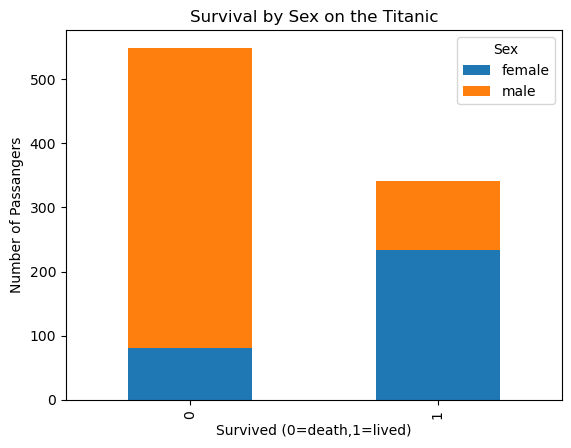

In [14]:
pd.crosstab(df['Survived'], df['Sex']).plot(kind='bar', title='Survival by Sex on the Titanic', ylabel='Number of Passangers', xlabel='Survived (0=death,1=lived)', stacked=True)

In [15]:
df.loc[df['Parch'] == 0, 'Parch_cat'] = 0
df.loc[df['Parch'] > 0, 'Parch_cat'] = 1

pd.crosstab(df['Parch'], df['Parch_cat'])

Parch_cat,0.0,1.0
Parch,,
0,678,0
1,0,118
2,0,80
3,0,5
4,0,4
5,0,5
6,0,1


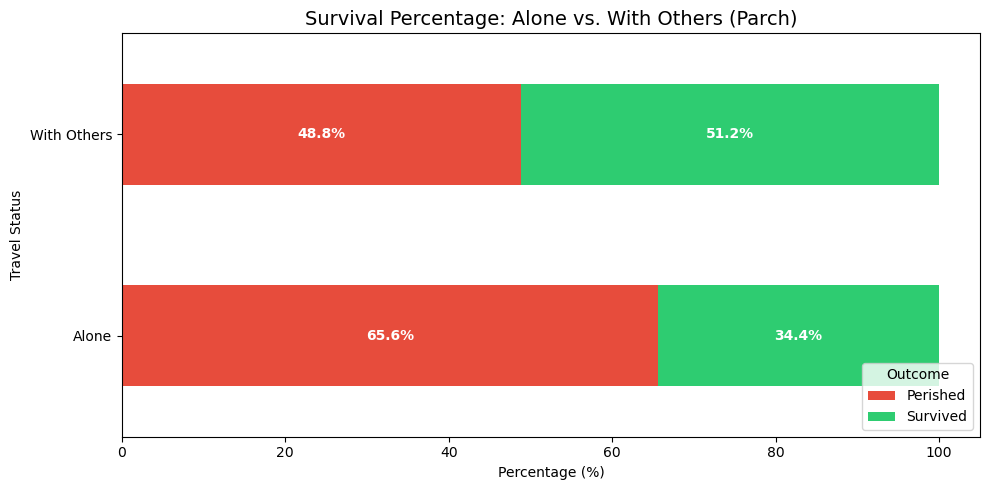

In [16]:
# 1. Create a new column to distinguish "Alone" from "With Others"
# If Parch is 0, they are "Alone". If Parch is 1 or more, they are "With Others".
df['Travel_Status'] = np.where(df['Parch'] == 0, 'Alone', 'With Others')

# 2. Create the crosstab using the new column
ct = pd.crosstab(df['Travel_Status'], df['Survived'], normalize='index') * 100

# 3. Plot as a horizontal stacked bar chart
ax = ct.plot(kind='barh', 
             stacked=True, 
             figsize=(10, 5), 
             color=['#e74c3c', '#2ecc71'])

# 4. Formatting
plt.title('Survival Percentage: Alone vs. With Others (Parch)', fontsize=14)
plt.xlabel('Percentage (%)')
plt.ylabel('Travel Status')
plt.legend(title='Outcome', labels=['Perished', 'Survived'], loc='lower right')

# Add percentage text labels
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f'{width:.1f}%', 
                    (p.get_x() + width / 2, p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()